# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
import json
import requests

%matplotlib inline

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = ('ce20b5e5938d4bb0b0b728581957bac7')
type(api_key)

str

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin_headlines['totalResults']

3476

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")
ethereum_headlines['totalResults']

1218

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [8]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)


bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,0.0000,0.000,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...,PayPal has partnered with cryptocurrency compa...
1,0.6808,0.000,0.838,0.162,PayPal and Venmo will offer and accept cryptoc...,PayPal is rolling out cryptocurrency support l...
2,-0.7184,0.154,0.846,0.000,Bitcoin Mixer Designed to Bypass Money Launder...,The Financial Crimes Enforcement Network (FinC...
3,0.2500,0.000,0.935,0.065,'One day everyone will use China's digital cur...,Image copyrightChandler GuoImage caption\r\n C...
4,0.2732,0.071,0.831,0.098,PayPal’s Big Crypto Move Is All Hype,Cryptocurrencies like bitcoin are a fun way to...


In [9]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [10]:
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,0.0000,0.000,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...,PayPal has partnered with cryptocurrency compa...
1,0.0000,0.000,1.000,0.000,Luxury watch maker Breitling issues digital ce...,Breitling is partnering with Arianee to issue ...
2,-0.2960,0.061,0.939,0.000,Getting Drawn Into DeFi? Here Are 3 Major Cons...,"September\r\n30, 2020\r\n8 min read\r\nOpinion..."
3,0.6808,0.000,0.838,0.162,PayPal and Venmo will offer and accept cryptoc...,PayPal is rolling out cryptocurrency support l...
4,-0.4215,0.132,0.783,0.085,The world's largest digital currency asset man...,Portions of the global economy melted down in ...


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.00000
mean,0.075805,0.04590,0.902050,0.05205
std,0.447820,0.07060,0.070964,0.05704
min,-0.718400,0.00000,0.797000,0.00000
25%,-0.068300,0.00000,0.839500,0.00000
50%,0.125000,0.00000,0.907500,0.06000
75%,0.428175,0.07675,0.951250,0.09000
max,0.726900,0.20300,1.000000,0.18600


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.156029,0.013882,0.932118,0.054000
std,0.307767,0.035105,0.073736,0.063395
min,-0.421500,0.000000,0.783000,0.000000
25%,0.000000,0.000000,0.887000,0.000000
50%,0.000000,0.000000,0.939000,0.046000
75%,0.401900,0.000000,1.000000,0.085000
max,0.680800,0.132000,1.000000,0.198000


### Questions:

Q: Which coin had the highest mean positive score?

A: Both have similar mean positive scores. However, Bitcoin slightly edges out ethereum.

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'char', 'every', 'has', 'have', 'had', 'colleague'}

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [16]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_tokens = bitcoin_df.copy()

In [17]:
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [18]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

In [19]:
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text,tokens_title
0,0.0000,0.000,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...,PayPal has partnered with cryptocurrency compa...,"[paypal, ha, partnered, cryptocurrency, compan..."
1,0.6808,0.000,0.838,0.162,PayPal and Venmo will offer and accept cryptoc...,PayPal is rolling out cryptocurrency support l...,"[paypal, rolling, cryptocurrency, support, lat..."
2,-0.7184,0.154,0.846,0.000,Bitcoin Mixer Designed to Bypass Money Launder...,The Financial Crimes Enforcement Network (FinC...,"[financial, crimes, enforcement, network, finc..."
3,0.2500,0.000,0.935,0.065,'One day everyone will use China's digital cur...,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
4,0.2732,0.071,0.831,0.098,PayPal’s Big Crypto Move Is All Hype,Cryptocurrencies like bitcoin are a fun way to...,"[cryptocurrencies, like, bitcoin, fun, way, sk..."


In [20]:
btc_string = bitcoin_tokens['text'].str.cat()

In [21]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_tokens = ethereum_df.copy()

In [22]:

tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [23]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [24]:
tokenized_eth = []
for i in ethereum_tokens['Ethereum title']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

In [25]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

In [26]:
ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text,tokens_text,tokens_title
0,0.0000,0.000,1.000,0.000,PayPal to let you buy and sell cryptocurrencie...,PayPal has partnered with cryptocurrency compa...,"[paypal, ha, partnered, cryptocurrency, compan...","[paypal, let, buy, sell, cryptocurrencies, us]"
1,0.0000,0.000,1.000,0.000,Luxury watch maker Breitling issues digital ce...,Breitling is partnering with Arianee to issue ...,"[breitling, partnering, arianee, issue, new, k...","[luxury, watch, maker, breitling, issue, digit..."
2,-0.2960,0.061,0.939,0.000,Getting Drawn Into DeFi? Here Are 3 Major Cons...,"September\r\n30, 2020\r\n8 min read\r\nOpinion...","[september, min, readopinions, expressed, entr...","[getting, drawn, defi, major, considerations]"
3,0.6808,0.000,0.838,0.162,PayPal and Venmo will offer and accept cryptoc...,PayPal is rolling out cryptocurrency support l...,"[paypal, rolling, cryptocurrency, support, lat...","[paypal, venmo, offer, accept, cryptocurrency,..."
4,-0.4215,0.132,0.783,0.085,The world's largest digital currency asset man...,Portions of the global economy melted down in ...,"[portions, global, economy, melted, emerging, ...","[world, largest, digital, currency, asset, man..."


In [54]:
eth_string = ethereum_tokens['text'].str.cat()

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [28]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
all_bitcoin_words = []
for text in bitcoin_tokens['text']:
    for word in text:
        all_bitcoin_words.append(word)

In [29]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
all_eth_words = []
for text in ethereum_tokens['text']:
    for word in text:
        all_eth_words.append(word)

In [30]:
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [31]:
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [32]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

In [33]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bigram_counter(bitcoin_sent)


,Bigram,Count
0,"(satoshi, nakaboto)",6
1,"(bitcoin, btc)",4
2,"(reuters, stafffile)",3
3,"(stafffile, photo)",3
4,"(photo, representations)",3
5,"(representations, virtual)",3
6,"(virtual, currency)",3
7,"(currency, bitcoin)",3
8,"(bitcoin, seen)",3
9,"(seen, picture)",3


In [35]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
bigram_counter(eth_sent)


,Bigram,Count
0,"(london, reuters)",4
1,"(reuters, paypal)",4
2,"(paypal, holdings)",4
3,"(holdings, inc)",4
4,"(joined, cryptocurrency)",4
5,"(cryptocurrency, market)",4
6,"(market, wednesday)",4
7,"(wednesday, allowing)",4
8,"(allowing, customer)",4
9,"(customer, buy)",4


In [36]:
tokens_btc = tokenizer(btc_string)
token_count(tokens_btc)

[('bitcoin', 20),
 ('reuters', 15),
 ('charsby', 6),
 ('taken', 6),
 ('satoshi', 6),
 ('nakaboto', 6),
 ('cryptocurrency', 5),
 ('wa', 5),
 ('currency', 4),
 ('pay', 4)]

In [37]:
token_count(all_eth_words)

[(' ', 539),
 ('e', 283),
 ('a', 225),
 ('t', 216),
 ('n', 205),
 ('r', 196),
 ('o', 192),
 ('i', 188),
 ('s', 175),
 ('c', 138)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [39]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [40]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

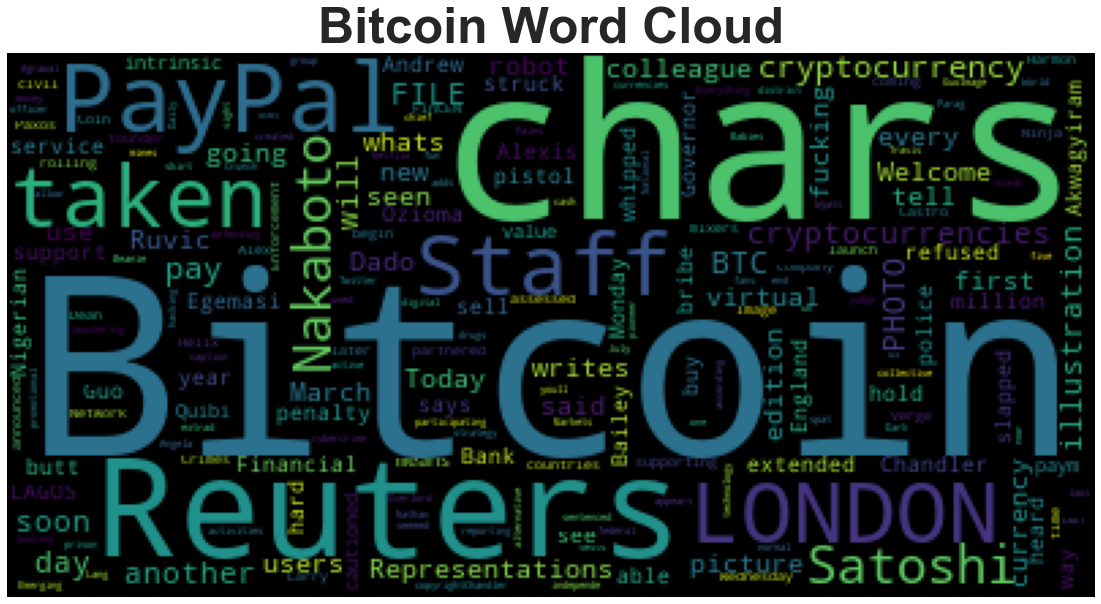

In [41]:
wc = WordCloud(collocations=False).generate(btc_string)
fig = plt.figure()
plt.imshow(wc)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

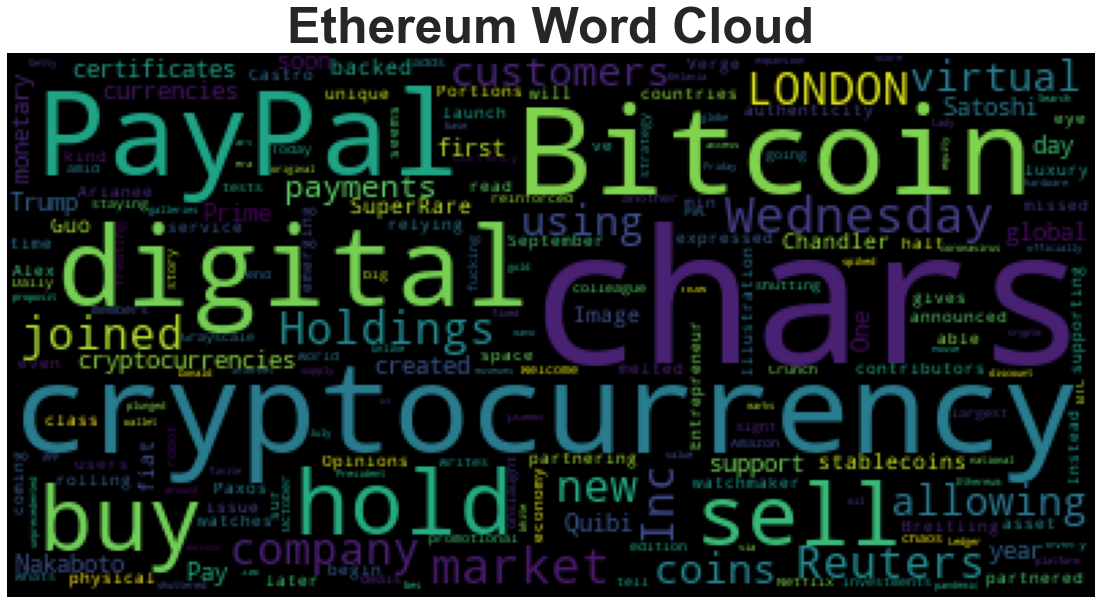

In [55]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud(collocations=False).generate(eth_string)
fig = plt.figure()
plt.imshow(wc)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [56]:
import spacy
from spacy import displacy

In [44]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [57]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [63]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_text = ' '.join(bitcoin_tokens['text'])
btc_text

"PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars] PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars] Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars] Cryptocurrencies like bitcoin are a fun way to skirt money-laundering laws and pay for drugs, but, according to reporting by Reut

In [64]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"



In [65]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style = 'ent')

In [71]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent.text, ent.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
September DATE
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
2020 DATE
Grayscale Investments ORG
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
US GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
Bitcoin GPE
Bitcoins NORP
SuperRare ORG
S

---

## Ethereum NER

In [66]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_text = ' '.join(ethereum_tokens['text'])
eth_text

"PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars] Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars] September\r\n30, 2020\r\n8 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars] PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power am

In [68]:

# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [69]:
# Render the visualization
displacy.render(doc, style = 'ent')

In [70]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent.text, ent.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
September DATE
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
2020 DATE
Grayscale Investments ORG
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
US GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
Bitcoin GPE
Bitcoins NORP
SuperRare ORG
S